In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import numpy as np

# Content-Based Filtering

In [ ]:
games_df = pd.read_csv("data/games.csv")
games_df.sample(10)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
22971,1229310,Godking: Master of Rituals,"Sep 16, 2020",0 - 20000,0,0,29.99,0,Godking: Master of Rituals is a fantasy strate...,['English'],...,0,35,0,Sensiga,Sensiga,Single-player,Strategy,"Strategy,4X,Turn-Based Strategy,Fantasy,Strate...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
7905,1222670,The Sims™ 4,"Jun 18, 2020",1000000 - 2000000,20055,0,19.99,57,Unleash your imagination and create a world of...,"['English', 'French', 'Italian', 'German', 'Sp...",...,362,379,397,Maxis,Electronic Arts,"Single-player,Steam Trading Cards,Remote Play ...","Casual,Simulation","Life Sim,Character Customization,Simulation,Bu...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
64697,2174090,Sincognito Playtest,"Oct 11, 2022",0 - 0,0,0,0.00,0,NaN,[],...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49654,321920,Schein,"Oct 9, 2014",100000 - 200000,1,0,4.99,0,"Schein is an award-winning, puzzle platformer ...","['English', 'German', 'French', 'Spanish - Spa...",...,0,112,0,Zeppelin Studio,Meridian4,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Precision Platformer,Side Scroller,Sokoban,2D ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
38702,935880,Glass Masquerade 2: Illusions,"Feb 27, 2019",100000 - 200000,23,0,4.99,3,Welcome to the Glass Masquerade sequel - an ar...,"['English', 'French', 'German', 'Japanese', 'K...",...,0,1174,0,Onyx Lute,Onyx Lute,"Single-player,Steam Achievements,Steam Trading...","Casual,Indie","Casual,Indie,Puzzle,Relaxing,Beautiful,Great S...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
63275,1165500,GameLab UngAalborg,"Sep 8, 2022",0 - 0,0,0,0.00,0,Welcome to GameLab UngAalborg's game launcher!...,['English'],...,0,0,0,GameLab UngAalborg,UngAalborg,Single-player,Indie,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
7576,1605010,Adorable Witch,"Jun 16, 2021",50000 - 100000,4,0,1.99,1,"This is a casual strategy game, how to avoid t...","['English', 'Russian', 'Japanese', 'Simplified...",...,0,89,0,Lovely Games,Lovely Games,"Single-player,Steam Achievements",Strategy,"Sexual Content,Hentai,Nudity,Strategy,Mature,P...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
73222,1906510,Arto,"May 1, 2023",0 - 20000,6,0,15.99,0,"Arto is a colorful hack-n-slash action-RPG, a ...",['English'],...,0,0,0,OrionGames,Freedom Games,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Action,Open World,Adventure,Action-Adventure,C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
45209,665060,Triangulate,"Aug 11, 2017",20000 - 50000,0,0,1.99,0,"Triangulate, a game that is easy to learn but ...",['English'],...,0,0,0,Left Flank Games,Left Flank Games,"Single-player,Steam Achievements,Partial Contr...","Casual,Indie,Strategy","Strategy,Indie,Casual",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
33012,1164300,1001 Jigsaw. Ice Age,"Feb 23, 2020",0 - 20000,0,0,4.99,0,1001 Jigsaw. Ice Age - is an exciting puzzle g...,"['English', 'French', 'German', 'Russian']",...,0,0,0,Somer Games,8floor,Single-player,Casual,"Casual,Indie,Puzzle,Singleplayer,Adventure",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
games_df["Total"] = games_df.Positive + games_df.Negative
games_df[["Name", "Positive", "Negative", "Total"]]

,Name,Positive,Negative,Total
0,Galactic Bowling,6,11,17
1,Train Bandit,53,5,58
2,Jolt Project,0,0,0
3,Henosis™,3,0,3
4,Two Weeks in Painland,50,8,58
...,...,...,...,...
74684,Frosthaven: Official Companion,0,0,0
74685,Airscrew Racing Playtest,0,0,0
74686,Dark Legions,3,0,3
74687,Undead Citadel,47,29,76


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
games_df["Estimated owners"].unique()

array(['0 - 20000', '50000 - 100000', '20000 - 50000', '200000 - 500000',
       '100000 - 200000', '2000000 - 5000000', '0 - 0',
       '500000 - 1000000', '1000000 - 2000000', '20000000 - 50000000',
       '5000000 - 10000000', '10000000 - 20000000',
       '50000000 - 100000000', '100000000 - 200000000'], dtype=object)

In [ ]:
games_df["Min Estimated owners"] = [int(val.split(' - ')[0]) for val in games_df["Estimated owners"]]
games_df = games_df.sort_values("Min Estimated owners")
games_df["Estimated owners"].value_counts()

0 - 20000                49037
0 - 0                     8263
20000 - 50000             7368
50000 - 100000            3664
100000 - 200000           2452
200000 - 500000           2055
500000 - 1000000           879
1000000 - 2000000          502
2000000 - 5000000          319
5000000 - 10000000          86
10000000 - 20000000         38
20000000 - 50000000         21
50000000 - 100000000         4
100000000 - 200000000        1
Name: Estimated owners, dtype: int64

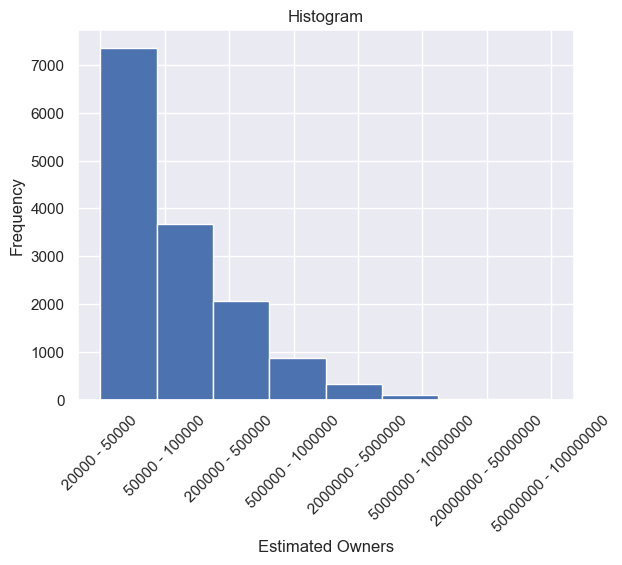

In [ ]:
processed_data = games_df[games_df["Estimated owners"].str.contains('0 - 0')==False ]

# Plotting the histogram
sns.set(style="darkgrid")  # Setting the style
plt.hist(processed_data["Estimated owners"], processed_data["Estimated owners"].nunique())

# Adding labels and title
plt.xticks(rotation=45)
plt.xlabel('Estimated Owners')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

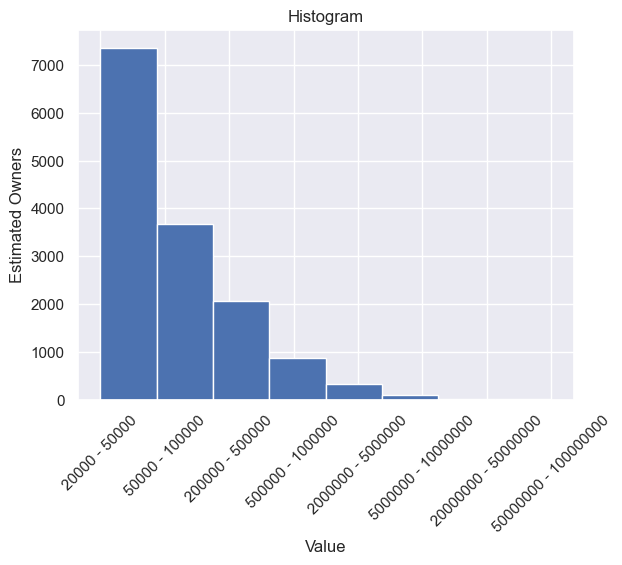

In [ ]:
processed_data = games_df[games_df["Estimated owners"].str.contains('0 - 0|0 - 20000')==False ]

# Plotting the histogram
sns.set(style="darkgrid")  # Setting the style
plt.hist(processed_data["Estimated owners"], processed_data["Estimated owners"].nunique())

# Adding labels and title
plt.xticks(rotation=45)
plt.xlabel('Value')
plt.ylabel('Estimated Owners')
plt.title('Histogram')

# Displaying the plot
plt.show()

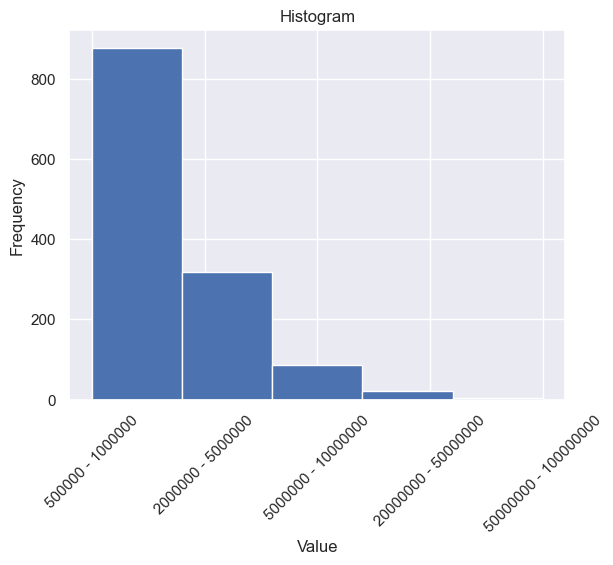

In [ ]:
processed_data = games_df[games_df["Estimated owners"].str.contains('0 - 0|0 - 20000|50000 - 100000|20000 - 50000|200000 - 500000|100000 - 200000')==False ]

# Plotting the histogram
sns.set(style="darkgrid")  # Setting the style
plt.hist(processed_data["Estimated owners"], processed_data["Estimated owners"].nunique())

# Adding labels and title
plt.xticks(rotation=45)
plt.xlabel('Estimated Owners')
plt.ylabel('Frequency')
plt.title('Histogram')

# Displaying the plot
plt.show()

In [ ]:
games_df = games_df[games_df["Estimated owners"].str.contains('0 - 0|0 - 20000')==False].reset_index(drop=True)
games_df.shape

(14396, 41)

count    14387.000000
mean         0.758532
std          0.190552
min          0.000000
25%          0.664202
50%          0.800151
75%          0.900679
max          1.000000
Name: Recommendation ratio, dtype: float64


Text(0.5, 1.0, 'Reccomendation Ratio')

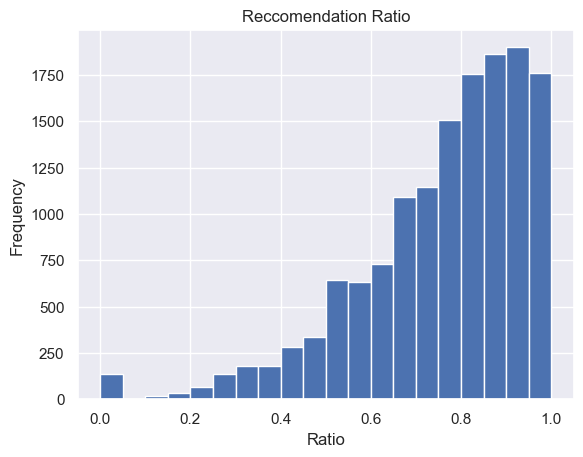

In [ ]:
games_df["Recommendation ratio"] = games_df.Positive/(games_df.Positive+games_df.Negative)

    # # Filter the top 10 games based on user ratings
    # rated_games = df.iloc[top_10_indices].merge(user_ratings, on='GameTitle')
    # filtered_games = rated_games[rated_games['Rating'] >= 0.7]  # Adjust the rating threshold as needed
print(games_df["Recommendation ratio"].describe())
plt.hist(games_df["Recommendation ratio"], bins=20)
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Reccomendation Ratio')

In [ ]:
games_df['Tags'].str.split(',')

0        [Robots, Sci-fi, Casual, Indie, Funny, 2D Figh...
1        [Early Access, Sandbox, Naval Combat, Voxel, C...
2        [Casual, Puzzle, Arcade, Puzzle-Platformer, 3D...
3        [Simulation, Strategy, Life Sim, Realistic, Ar...
4        [Simulation, Strategy, Turn-Based Strategy, Po...
                               ...                        
14391    [MMORPG, Free to Play, Action RPG, RPG, Hack a...
14392    [Free to Play, Hero Shooter, Multiplayer, FPS,...
14393    [Survival, Shooter, Multiplayer, Battle Royale...
14394    [FPS, Shooter, Multiplayer, Competitive, Actio...
14395    [Massively Multiplayer, Open World, MMORPG, RP...
Name: Tags, Length: 14396, dtype: object

In [ ]:
games_df['Tags'] = games_df['Tags'].str.split(',')
games_df['Categories'] = games_df['Categories'].str.split(',')
games_df['Genres'] = games_df['Genres'].str.split(',')

games_df[['Genres', 'Categories', 'Tags']]


,Genres,Categories,Tags
0,"[Action, Casual, Indie, RPG]",[Single-player],"[Robots, Sci-fi, Casual, Indie, Funny, 2D Figh..."
1,"[Indie, Simulation, Strategy, Early Access]","[Single-player, Steam Workshop]","[Early Access, Sandbox, Naval Combat, Voxel, C..."
2,"[Action, Casual, Indie]","[Single-player, Multi-player, PvP, Shared/Spli...","[Casual, Puzzle, Arcade, Puzzle-Platformer, 3D..."
3,"[Indie, Simulation, Strategy]",[Single-player],"[Simulation, Strategy, Life Sim, Realistic, Ar..."
4,"[Simulation, Strategy]",[Single-player],"[Simulation, Strategy, Turn-Based Strategy, Po..."
...,...,...,...
14391,"[Action, Adventure, Free to Play, Massively Mu...","[Single-player, Multi-player, MMO, PvP, Online...","[MMORPG, Free to Play, Action RPG, RPG, Hack a..."
14392,"[Action, Free to Play]","[Multi-player, Cross-Platform Multiplayer, Ste...","[Free to Play, Hero Shooter, Multiplayer, FPS,..."
14393,"[Action, Adventure, Free to Play, Massively Mu...","[Multi-player, PvP, Online PvP, Stats, Remote ...","[Survival, Shooter, Multiplayer, Battle Royale..."
14394,"[Action, Free to Play]","[Multi-player, Steam Achievements, Full contro...","[FPS, Shooter, Multiplayer, Competitive, Actio..."


In [ ]:
games_df['combined_features'] = games_df['Tags'] + games_df['Categories'] + games_df['Genres']
games_df['combined_features'] 

0        [Robots, Sci-fi, Casual, Indie, Funny, 2D Figh...
1        [Early Access, Sandbox, Naval Combat, Voxel, C...
2        [Casual, Puzzle, Arcade, Puzzle-Platformer, 3D...
3        [Simulation, Strategy, Life Sim, Realistic, Ar...
4        [Simulation, Strategy, Turn-Based Strategy, Po...
                               ...                        
14391    [MMORPG, Free to Play, Action RPG, RPG, Hack a...
14392    [Free to Play, Hero Shooter, Multiplayer, FPS,...
14393    [Survival, Shooter, Multiplayer, Battle Royale...
14394    [FPS, Shooter, Multiplayer, Competitive, Actio...
14395    [Massively Multiplayer, Open World, MMORPG, RP...
Name: combined_features, Length: 14396, dtype: object

In [ ]:
# Compute the TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(games_df['combined_features'].astype(str))

# Compute the cosine similarity matrix
cosine_similarities_TFIDF = cosine_similarity(tfidf_matrix, tfidf_matrix)
# Save the similarity matrix to a file
np.save('cosine_similarities_TFIDF.npy', cosine_similarities_TFIDF)

In [ ]:
euclidean_similarities_TFIDF = euclidean_distances(tfidf_matrix, tfidf_matrix)
np.save('euclidean_similarities_TFIDF.npy', euclidean_similarities_TFIDF)

In [ ]:
# Compute the count matrix using CountVectorizer
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(games_df['combined_features'].astype(str))

# Compute the cosine similarity matrix using the count matrix
cosine_similarities_CV = cosine_similarity(count_matrix, count_matrix)
np.save('cosine_similarities_CV.npy', cosine_similarities_CV)

In [ ]:
euclidean_similarities_CV = euclidean_distances(count_matrix, count_matrix)
np.save('euclidean_similarities_CV.npy', euclidean_similarities_CV)

In [ ]:
# Example usage to load the similarity matrices
cosine_similarities_TFIDF = np.load('cosine_similarities_TFIDF.npy')
euclidean_similarities_TFIDF = np.load('euclidean_similarities_TFIDF.npy')
cosine_similarities_CV = np.load('cosine_similarities_CV.npy')
euclidean_similarities_CV = np.load('euclidean_similarities_CV.npy')

In [ ]:
# Define a function to get recommendations based on a game's index
def get_recommendations(game_index, similarities, df=games_df):
    # Get the similarity scores of the game with other games
    similarity_scores = list(enumerate(similarities[game_index]))

    # Sort the games based on similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top 10 similar games
    top_10_indices = [i[0] for i in similarity_scores[1:11]]
        
    # Filter the top 10 games based on user ratings
    rated_games = df.iloc[top_10_indices].merge(games_df, on='Name')
    filtered_games = rated_games[games_df['Recommendation ratio'] >= games_df["Recommendation ratio"].mean()]  # Adjust the rating threshold as needed



    # Return the top 10 similar games
    return df.iloc[top_10_indices]#['Name']

In [ ]:
games_df.sample(10)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
7686,316890,Calvino Noir,"Aug 27, 2015",50000 - 100000,0,0,6.99,0,The film noir stealth game. Calvino Noir is th...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Calvino Noir,"[Single-player, Steam Achievements, Full contr...","[Adventure, Indie]","[Adventure, Indie, Stealth, Noir, Platformer, ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,363,50000,0.647383,"[Adventure, Indie, Stealth, Noir, Platformer, ..."
7755,1205240,Tentacle Girl,"Feb 14, 2020",50000 - 100000,6,0,1.99,1,Tentacle Girl is a jigsaw puzzle. Each picture...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Inverse Game,"[Single-player, Steam Achievements, Steam Cloud]","[Adventure, Casual, RPG, Strategy]","[Sexual Content, Casual, Nudity, RPG, Adventur...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,1120,50000,0.898214,"[Sexual Content, Casual, Nudity, RPG, Adventur..."
10067,279940,The Book of Unwritten Tales 2,"Feb 19, 2015",50000 - 100000,7,0,29.99,1,Every world needs its heroes. However unlikely...,"['English', 'German', 'French', 'Italian', 'Sp...",...,THQ Nordic,"[Single-player, Steam Achievements, Full contr...",[Adventure],"[Fantasy, Singleplayer, Adventure, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,854,50000,0.914520,"[Fantasy, Singleplayer, Adventure, Point & Cli..."
1071,1062100,HaberDashers,"May 27, 2020",20000 - 50000,0,0,0.00,0,HaberDashers is a console-style arcade (kart) ...,['English'],...,SMU Guildhall,"[Single-player, Multi-player, PvP, Shared/Spli...","[Casual, Free to Play, Indie, Racing]","[Racing, Free to Play, Casual, Indie, Local Mu...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,74,20000,0.675676,"[Racing, Free to Play, Casual, Indie, Local Mu..."
345,954760,The Cells,"Oct 23, 2018",20000 - 50000,0,0,0.99,0,Here is a great game in the genre of puzzles. ...,['English'],...,CasGames,[Single-player],"[Casual, Indie]","[Indie, Casual, Singleplayer]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,8,20000,0.625000,"[Indie, Casual, Singleplayer, Single-player, C..."
5177,212110,Sugar Cube: Bittersweet Factory,"Nov 7, 2012",20000 - 50000,0,0,6.99,0,A cube of sugar escapes from factories to avoi...,"['English', 'Japanese']",...,Turtle Cream,"[Single-player, Steam Achievements, Steam Trad...","[Action, Indie]","[Indie, Platformer, Action, Puzzle-Platformer,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,196,20000,0.729592,"[Indie, Platformer, Action, Puzzle-Platformer,..."
8045,397690,Hyperspace Invaders II: Pixel Edition,"Sep 4, 2015",50000 - 100000,0,0,4.99,0,Hyperspace Invaders II: Pixel Edition is a har...,['English'],...,Plug In Digital,"[Single-player, Steam Achievements, Partial Co...","[Action, Indie]","[Action, Indie, Bullet Hell, Shoot 'Em Up, Gre...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,381,50000,0.808399,"[Action, Indie, Bullet Hell, Shoot 'Em Up, Gre..."
6397,872700,Jet-Story 2018,"Jul 3, 2018",20000 - 50000,0,0,0.00,1,Jet-Story 2018 is 30th anniversary remake of 8...,['English'],...,CYBEXLAB,"[Single-player, Partial Controller Support]","[Action, Free to Play, Indie]","[Free to Play, Action, Indie, 2D]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,31,20000,0.935484,"[Free to Play, Action, Indie, 2D, Single-playe..."
1038,485920,Neon Warp,"Jul 29, 2016",20000 - 50000,0,0,0.51,0,Neon Warp is a simple yet very unique puz

In [ ]:
games_df.loc[[10245]]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
10245,414660,Vampire Legends: The True Story of Kisilova,"Dec 3, 2015",50000 - 100000,0,0,9.99,0,Vampire Legends: The True Story of Kisilova is...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Adventure, Hidden Object, Casual, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,549,50000,0.857923,"[Adventure, Hidden Object, Casual, Point & Cli..."


In [ ]:
# Get recommendations for a game at index 0
recommendations = get_recommendations(10245, similarities=cosine_similarities_TFIDF)
recommendations.Name

/var/folders/5h/f1lw57h96t752ngkx9khmd1m0000gn/T/ipykernel_51241/925983644.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_games = rated_games[games_df['Recommendation ratio'] >= games_df["Recommendation ratio"].mean()]  # Adjust the rating threshold as needed


252           Faces of Illusion: The Twin Phantoms
580                Tiny Tales: Heart of the Forest
1294                 The Secret Order 6: Bloodline
1593                Ghost Files: The Face of Guilt
4078              Queen's Quest 3: The End of Dawn
4476    Queen's Quest 2: Stories of Forgotten Past
4773                  Agent Walker: Secret Journey
6349              Scarlett Mysteries: Cursed Child
6899              Persian Nights: Sands of Wonders
7167              Eventide 2: The Sorcerers Mirror
Name: Name, dtype: object

In [ ]:
# Get recommendations for a game at index 0
recommendations = get_recommendations(10245, similarities=cosine_similarities_CV)
recommendations

/var/folders/5h/f1lw57h96t752ngkx9khmd1m0000gn/T/ipykernel_51241/925983644.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_games = rated_games[games_df['Recommendation ratio'] >= games_df["Recommendation ratio"].mean()]  # Adjust the rating threshold as needed


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
252,558340,Faces of Illusion: The Twin Phantoms,"Jan 19, 2017",20000 - 50000,0,0,9.99,0,Embark on an exciting adventure between magic ...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Adventure, Casual, Hidden Object, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,155,20000,0.593548,"[Adventure, Casual, Hidden Object, Point & Cli..."
580,637060,Tiny Tales: Heart of the Forest,"Jul 20, 2017",20000 - 50000,0,0,9.99,0,There is a secret world hidden at the bottom o...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Adventure, Casual, Hidden Object, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,182,20000,0.774725,"[Adventure, Casual, Hidden Object, Point & Cli..."
1294,662190,The Secret Order 6: Bloodline,"Aug 31, 2017",20000 - 50000,4,0,9.99,0,THRILLING STORY SET IN A MYSTERIOUS JUNGLE! Si...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Casual, Adventure, Hidden Object, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,157,20000,0.923567,"[Casual, Adventure, Hidden Object, Point & Cli..."
1593,599560,Ghost Files: The Face of Guilt,"May 18, 2017",20000 - 50000,3,0,9.99,0,Step into the shoes of Emily Meyer from Boston...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Adventure, Casual, Hidden Object, Puzzle, Poi...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,235,20000,0.714894,"[Adventure, Casual, Hidden Object, Puzzle, Poi..."
4078,589690,Queen's Quest 3: The End of Dawn,"Apr 27, 2017",20000 - 50000,3,0,9.99,0,AN ADVENTURE OF ALCHEMY AND MAGIC AWAITS! Elia...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Casual, Adventure, Hidden Object, Puzzle, Poi...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,132,20000,0.757576,"[Casual, Adventure, Hidden Object, Puzzle, Poi..."
4476,558790,Queen's Quest 2: Stories of Forgotten Past,"Feb 9, 2017",20000 - 50000,5,0,9.99,0,When the king asked a famous alchemist to look...,"['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Adventure, Casual, Hidden Object, Fantasy, Po...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,208,20000,0.899038,"[Adventure, Casual, Hidden Object, Fantasy, Po..."
4773,497580,Agent Walker: Secret Journey,"Sep 1, 2016",20000 - 50000,3,0,9.99,0,AN INCREDIBLE HIDDEN OBJECT PUZZLE ADVENTURE G...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam Trad...","[Adventure, Casual]","[Casual, Adventure, Hidden Object, Point & Cli...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,214,20000,0.677570,"[Casual, Adventure, Hidden Object, Point & Cli..."
6349,615350,Scarlett Mysteries: Cursed Child,"Jun 8, 2017",20000 - 50000,2,0,9.99,0,"From an early age, Scarlett Everitt displayed ...","['English', 'French', 'Italian', 'German', 'Ja...",...,Artifex Mundi,"[Single-player, Steam Achievements, Steam

In [ ]:
# Get recommendations for a game at index 0
recommendations = get_recommendations(10245, similarities=euclidean_similarities_TFIDF)
recommendations

/var/folders/5h/f1lw57h96t752ngkx9khmd1m0000gn/T/ipykernel_51241/925983644.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_games = rated_games[games_df['Recommendation ratio'] >= games_df["Recommendation ratio"].mean()]  # Adjust the rating threshold as needed


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
215,1087320,Smithsonian American Art Museum Beyond The Walls,"Aug 7, 2019",20000 - 50000,0,0,0.00,0,"Go Beyond the Walls, a virtual reality experie...",['English'],...,Smithsonian American Art Museum,NaN,[Education],"[Education, VR]",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,46,20000,0.717391,NaN
257,1066860,RPG Paper Maker,"Jul 5, 2019",20000 - 50000,2,0,0.00,1,"This tool is under heavy, active development a...","['English', 'French', 'Spanish - Spain', 'Port...",...,Wano,NaN,[Game Development],"[Game Development, Free to Play, RPG, Software]",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,112,20000,0.839286,NaN
549,1069090,PureDesktop,"Aug 2, 2019",20000 - 50000,1,0,0.00,0,With PureDesktop you can easily create your ow...,"['English', 'German', 'French', 'Spanish - Spa...",...,PurePortal,[Includes level editor],"[Animation & Modeling, Design & Illustration, ...","[Design & Illustration, Utilities, Early Acces...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,44,20000,0.431818,"[Design & Illustration, Utilities, Early Acces..."
648,417540,Gamefuel Driver Control,"Dec 10, 2015",20000 - 50000,0,0,29.99,0,The problem: You may have hardware or devices ...,['English'],...,Console Classics,NaN,[Utilities],[Utilities],https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,15,20000,0.600000,NaN
666,687870,CINEVR,"Aug 28, 2017",20000 - 50000,0,0,0.00,0,"CINEVR is a virtual, immersive and social Movi...","['English', 'French']",...,ONE DIGITAL NATION,[In-App Purchases],"[Utilities, Video Production]","[Utilities, VR, 360 Video, Movie, Video Produc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,56,20000,0.303571,"[Utilities, VR, 360 Video, Movie, Video Produc..."
796,1154430,RPG Character Builder,"Oct 3, 2019",20000 - 50000,0,0,0.00,0,"An easy to use tool which uses free, open art,...",['English'],...,Cleardot Games,NaN,"[Animation & Modeling, Design & Illustration, ...","[Game Development, Design & Illustration, Anim...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,43,20000,0.813953,NaN
820,583620,3D Organon Anatomy,"Jun 23, 2017",20000 - 50000,2,0,24.99,0,"*****PLEASE NOTICE, THIS IS THE PERSONAL EDITI...",['English'],...,Medis Media,NaN,[Education],[Education],https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,93,20000,0.741935,NaN
1014,1512840,Virtual Gallery,"Jan 31, 2021",20000 - 50000,0,0,0.00,0,Virtual Gallery gives you a chance to watch yo...,['English'],...,THSoft,NaN,"[Casual, Simulation, Design & Illustration, Ph...","[Casual, Simulation, Design & Illustration, Ut...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,9,20000,0.888889,NaN
1055,34312,Ristar™,"Sep 13, 2010",20000 - 50000,0,0,0.99,0,The evil tyrant Greedy holds the galaxy of Val...,['English'],...,SEGA,"[Single-player, Partial Controller Support]",NaN,"[Platformer, Classic, Singleplayer, Great Soun...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,9,20000,1.000000,NaN
1098,12570,Hot Dish,"Jul 29, 2008",20000 - 50000,0,0,9.99,0,"Welcome to the world of HotDish, where knowing...","['English', 'French', 'German', 'Italian', 'Sp...",...,Ziggurat,[Single-player],NaN,"[Cooking, Casual]",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,29,20000,0.482759,NaN


In [ ]:
recommendations = get_recommendations(10245, similarities=euclidean_similarities_CV)
recommendations

/var/folders/5h/f1lw57h96t752ngkx9khmd1m0000gn/T/ipykernel_51241/925983644.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_games = rated_games[games_df['Recommendation ratio'] >= games_df["Recommendation ratio"].mean()]  # Adjust the rating threshold as needed


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
14380,291550,Brawlhalla,"Oct 17, 2017",20000000 - 50000000,16482,0,0.00,6,Brawlhalla : History's greatest warriors brawl...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Ubisoft,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Free to Play, Indie]","[Free to Play, Multiplayer, Fighting, Casual, ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,292973,20000000,0.840903,"[Free to Play, Multiplayer, Fighting, Casual, ..."
8685,663670,Killer Queen Black,"Oct 11, 2019",50000 - 100000,9,0,9.99,0,"Killer Queen Black , inspired by the hit arcad...","['English', 'French', 'Italian', 'German', 'Sp...",...,"Liquid Bit, LLC","[Multi-player, PvP, Online PvP, Shared/Split S...","[Action, Casual, Sports, Strategy]","[Action, Strategy, Online Co-Op, Multiplayer, ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,517,50000,0.928433,"[Action, Strategy, Online Co-Op, Multiplayer, ..."
2492,943370,Bravery and Greed,"Nov 15, 2022",20000 - 50000,413,0,19.99,1,Deep Robust Combat System Whether you're playi...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Team17,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Indie]","[Multiplayer, Rogue-lite, Hack and Slash, Beat...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,121,20000,0.859504,"[Multiplayer, Rogue-lite, Hack and Slash, Beat..."
13198,985890,Streets of Rage 4,"Apr 30, 2020",500000 - 1000000,282,0,24.99,1,"The all-time classic Streets of Rage, known as...","['English', 'French', 'Italian', 'German', 'Sp...",...,"Dotemu,Yooreka Studio (Greater China)","[Single-player, Multi-player, PvP, Online PvP,...","[Action, Indie]","[Action, Indie, Beat 'em up, 2D, Fighting, Onl...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,14204,500000,0.923331,"[Action, Indie, Beat 'em up, 2D, Fighting, Onl..."
3848,1196310,Fantasy Grounds Unity,"Nov 5, 2020",20000 - 50000,145,0,39.99,2366,Prep Less. Play Better. Fantasy Grounds is kno...,['English'],...,"SmiteWorks USA, LLC","[Single-player, Multi-player, Co-op, Online Co...","[Indie, RPG, Strategy]","[RPG, Dungeons & Dragons, Strategy, Indie, Sof...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,484,20000,0.876033,"[RPG, Dungeons & Dragons, Strategy, Indie, Sof..."
13946,1016920,Unrailed!,"Sep 23, 2020",500000 - 1000000,390,0,19.99,1,Unrailed! is a chaotic online and couch co-op ...,"['English', 'French', 'German', 'Simplified Ch...",...,"Daedalic Entertainment,bilibili(China)","[Single-player, Multi-player, PvP, Online PvP,...","[Action, Casual, Indie]","[Open World Survival Craft, Multiplayer, Co-op...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,13414,500000,0.932831,"[Open World Survival Craft, Multiplayer, Co-op..."
13111,523660,HYPERCHARGE: Unboxed,"Apr 27, 2020",500000 - 1000000,233,0,19.99,3,If you grew up watching classic toy movies and...,"['English', 'French', 'German', 'Spanish - Spa...",...,Digital Cybercherries,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, Casual, Indie, Strategy]","[Action, Shooter, Online Co-Op, FPS, Singlepla...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,2704,500000,0.909024,"[Action, Shooter, Online Co-Op, FPS, Singlepla..."
4826,731310,Undercrewed,"Sep 27, 2019",20000 - 50000,0,0,11.99,0,You are the last 4 survivors on your spacecraf...,['English'],...,David Strachan,"[Single-player, Multi-player, PvP, Online PvP,...","[Action, Adventure, 

# Collaborative Filtering

In [ ]:
import os

In [ ]:
# Path to the folder containing the CSV files
folder_path = "data/game_reviews/"

# Get all the CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith(".csv")]

# Initialize an empty list to store all the DataFrames
dataframes = []
file_names = []

# Loop through each CSV file and load it into a DataFrame
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        df = pd.read_csv(file_path, low_memory=False)
        df['File Name'] = file
        dataframes.append(df)



In [ ]:

# Concatenate all the DataFrames into a single DataFrame
reviews_df = pd.concat(dataframes)
# reviews_df['File Name'] = file_names
reviews_df["AppID"] = [int(val.split('_')[0]) for val in reviews_df["File Name"]]


# Reset the index of the combined DataFrame
reviews_df = reviews_df.reset_index(drop=True)
reviews_df = reviews_df.drop('Unnamed: 0', axis=1)
reviews_df

,recommendationid,language,review,timestamp_created,timestamp_updated,voted_up,votes_up,votes_funny,weighted_vote_score,comment_count,...,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,File Name,timestamp_dev_responded,developer_response,AppID
0,72709080,english,9/10,1594780907,1602080871,True,0,0,0.000000,0,...,44,6,4971.0,0.0,4971.0,1.594956e+09,49520_Borderlands2.csv,NaN,NaN,49520
1,77178303,english,this games used to have fine coop mode later w...,1602077600,1602077600,False,0,0,0.000000,0,...,60,9,4226.0,261.0,4184.0,1.602080e+09,49520_Borderlands2.csv,NaN,NaN,49520
2,77177415,english,[spoiler] ///// ///.. [/spoiler],1602076358,1602076358,True,0,0,0.000000,0,...,340,49,18042.0,4553.0,18042.0,1.602076e+09,49520_Borderlands2.csv,NaN,NaN,49520
3,76939576,english,❝ It's Cute That You All Think You're The Her...,1601684467,1602074441,True,14,0,0.681046,0,...,59,13,14037.0,0.0,14037.0,1.556718e+09,49520_Borderlands2.csv,NaN,NaN,49520
4,77173343,english,I love borderlands it is one of my top 10 game...,1602069852,1602069852,True,0,0,0.000000,0,...,742,43,7454.0,125.0,7329.0,1.602078e+09,49520_Borderlands2.csv,NaN,NaN,49520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4594070,41664480,english,Disappointing than a game released in 2018 doe...,1524589629,1524589629,False,68,12,0.284139,11,...,407,22,372.0,0.0,22.0,1.589905e+09,637090_BATTLETECH.csv,NaN,NaN,637090
4594071,41664383,english,"just got the game running, first command givin...",1524589353,1524589353,True,17,4,0.304560,1,...,162,1,17228.0,0.0,2314.0,1.578037e+09,637090_BATTLETECH.csv,NaN,NaN,637090
4594072,41664240,english,Mmmm I love the smell of dead mech in the morn...,1524588872,1524588872,True,12,4,0.274524,0,...,376,18,58.0,0.0,58.0,1.524605e+09,637090_BATTLETECH.csv,NaN,NaN,637090
4594073,41664159,english,"In the character creation process, you have th...",1524588589,1524588589,False,345,167,0.160115,285,...,225,2,25.0,0.0,25.0,1.524588e+09,637090_BATTLETECH.csv,NaN,NaN,637090


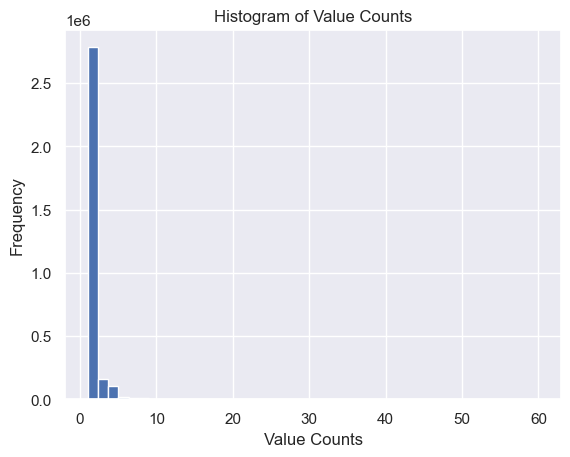

In [ ]:
plt.hist(reviews_df["author.steamid"].value_counts(), bins=reviews_df["author.steamid"].value_counts().nunique())
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Value Counts')
plt.show()

In [ ]:
multiple_reviews = reviews_df['author.steamid'].duplicated(keep=False)
multiple_reviews


0           True
1           True
2           True
3           True
4           True
           ...  
4594070     True
4594071    False
4594072     True
4594073    False
4594074     True
Name: author.steamid, Length: 4594075, dtype: bool

In [ ]:
# Keep only the rows with values that appear more than once
filtered_reviews_df = reviews_df[reviews_df['author.steamid'].isin(reviews_df['author.steamid'][multiple_reviews])]

# Reset the index of the filtered DataFrame
filtered_reviews_df = filtered_reviews_df.reset_index(drop=True)
filtered_reviews_df.shape

(2290638, 24)

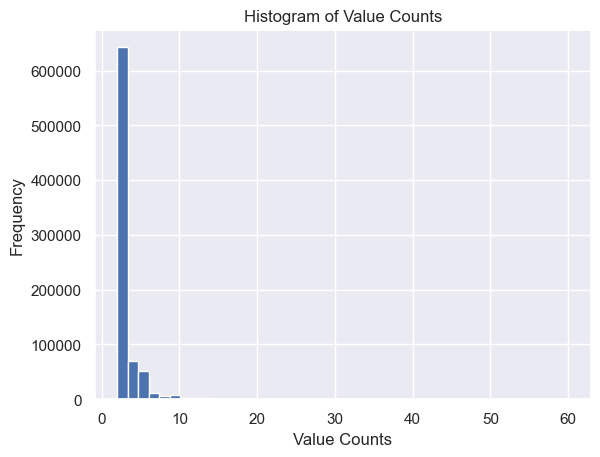

In [ ]:
plt.hist(filtered_reviews_df["author.steamid"].value_counts(), bins=filtered_reviews_df["author.steamid"].value_counts().nunique())
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Value Counts')
plt.show()

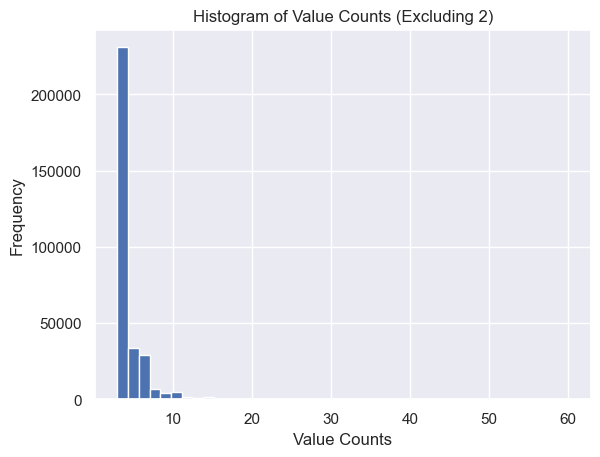

In [ ]:
value_counts = reviews_df['author.steamid'].value_counts()

# Exclude the counts of 2
processed_data = value_counts[~value_counts.isin([1,2])]
plt.hist(processed_data, bins=processed_data.nunique())
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Value Counts (Excluding 2)')
plt.show()

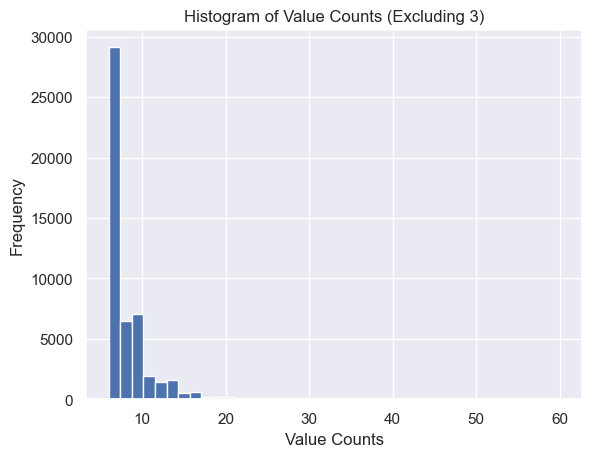

In [ ]:
value_counts = reviews_df['author.steamid'].value_counts()

# Exclude the counts of 2
processed_data = value_counts[~value_counts.isin([1,2,3,4,5])]
plt.hist(processed_data, bins=processed_data.nunique())
plt.xlabel('Value Counts')
plt.ylabel('Frequency')
plt.title('Histogram of Value Counts (Excluding 3)')
plt.show()

In [ ]:
filtered_reviews_df['author.steamid'].value_counts()

76561198062813911    60
76561198064946151    50
76561198093732780    48
76561197970460797    42
76561198315585536    42
                     ..
76561198861609602     2
76561199039525672     2
76561198840473479     2
76561198370390315     2
76561198132841059     2
Name: author.steamid, Length: 794639, dtype: int64

In [ ]:
author_counts = filtered_reviews_df['author.steamid'].value_counts()
# Filter the DataFrame to include only rows where 'author.steamid' occurs more than 3 times
trimmed_reviews_df = filtered_reviews_df[filtered_reviews_df['author.steamid'].isin(author_counts[author_counts > 5].index)]

# Reset the index of the filtered DataFrame
trimmed_reviews_df = trimmed_reviews_df.reset_index(drop=True)

In [ ]:
trimmed_reviews_df['author.steamid']

0         76561198201249425
1         76561197972212219
2         76561198104791786
3         76561198061630242
4         76561198956112034
                ...        
400069    76561198004628500
400070    76561198162763066
400071    76561198004549256
400072    76561198119410957
400073    76561198064439937
Name: author.steamid, Length: 400074, dtype: object

In [ ]:
user_item_df = trimmed_reviews_df[['author.steamid', 'AppID', 'weighted_vote_score']]  # Adjust the item column name accordingly
# Step 2: Create the user-item matrix
user_item_matrix = user_item_df.pivot_table(index='author.steamid', columns='AppID', values='weighted_vote_score')


In [ ]:
user_item_matrix.shape

(49571, 185)

In [ ]:
# Step 3: Calculate user similarities
user_similarities = cosine_similarity(user_item_matrix.fillna(0))
# Save the similarity matrix to a file
np.save('user_similarities.npy', user_similarities)

In [ ]:
user_item_df

,author.steamid,AppID,weighted_vote_score
0,76561198201249425,49520,0.000000
1,76561197972212219,49520,0.000000
2,76561198104791786,49520,0.000000
3,76561198061630242,49520,0.000000
4,76561198956112034,49520,0.000000
...,...,...,...
400069,76561198004628500,637090,0.804457
400070,76561198162763066,637090,0.283101
400071,76561198004549256,637090,0.284139
400072,76561198119410957,637090,0.274524


In [ ]:
user_item_matrix.index.get_loc(76561199070390693)

49561

In [ ]:
# Define a function to get recommendations based on a game's index
def get_user_recs(target_user, similarities, df=games_df):
    target_user_index = user_item_matrix.index.get_loc(target_user)
    similar_users = user_similarities[target_user_index]
    top_similar_user_indices = similar_users.argsort()[::-1][1:]  # Exclude the target user

    # Retrieve recommendations from similar users
    recommendations = user_item_matrix.iloc[top_similar_user_indices].mean().sort_values(ascending=False)
    # Get the indices of the top 10 similar games

    top_10_indices = recommendations[1:11].index
    # Return the top 10 similar games
    return df[games_df['AppID'].isin(top_10_indices)]

In [ ]:
games_df[games_df['AppID'].isin(trimmed_reviews_df[trimmed_reviews_df['author.steamid'] == 76561199070390693].AppID)]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
14189,552500,Warhammer: Vermintide 2,"Mar 8, 2018",2000000 - 5000000,5603,0,29.99,14,Warhammer: Vermintide 2 is a 4-player co-op ac...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Fatshark,"[Single-player, Multi-player, Co-op, Online Co...","[Action, Indie]","[Games Workshop, First-Person, Co-op, Dark Fan...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,88402,2000000,0.834777,"[Games Workshop, First-Person, Co-op, Dark Fan..."
14280,548430,Deep Rock Galactic,"May 13, 2020",2000000 - 5000000,10087,0,29.99,8,Deep Rock Galactic is a 1-4 player co-op FPS f...,"['English', 'French', 'German', 'Spanish - Spa...",...,Coffee Stain Publishing,"[Single-player, Multi-player, Co-op, Online Co...",[Action],"[Co-op, PvE, FPS, Exploration, Loot, Procedura...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,142772,2000000,0.967227,"[Co-op, PvE, FPS, Exploration, Loot, Procedura..."
14376,252490,Rust,"Feb 8, 2018",20000000 - 50000000,96112,17,39.99,4,The only aim in Rust is to survive. Everything...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Facepunch Studios,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Indie, Massively Multiplay...","[Survival, Crafting, Multiplayer, Open World, ...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,811910,20000000,0.866706,"[Survival, Crafting, Multiplayer, Open World, ..."


In [ ]:
recommendations = get_user_recs(76561199070390693, similarities=user_similarities)
recommendations

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Total,Min Estimated owners,Recommendation ratio,combined_features
12600,719890,Beasts of Bermuda,"Dec 21, 2018",200000 - 500000,1794,0,19.99,0,Beasts of Bermuda is a multiplayer game hostin...,"['English', 'German', 'Russian', 'French', 'Sp...",...,"Sastrei Studios, LLC","[Multi-player, PvP, Online PvP]","[Adventure, Indie, Massively Multiplayer, Simu...","[Simulation, Dinosaurs, Massively Multiplayer,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,5628,200000,0.729744,"[Simulation, Dinosaurs, Massively Multiplayer,..."
12692,382310,Eco,"Feb 6, 2018",200000 - 500000,1336,0,29.99,0,"Enter the world of Eco, a fully simulated ecos...","['English', 'Simplified Chinese', 'Italian', '...",...,Strange Loop Games,"[Single-player, Multi-player, Co-op, Online Co...","[Indie, Simulation, Early Access]","[Open World Survival Craft, Survival, Multipla...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,9849,200000,0.823332,"[Open World Survival Craft, Survival, Multipla..."
14026,310950,Street Fighter V,"Feb 15, 2016",2000000 - 5000000,2997,0,19.99,17,Experience the intensity of head-to-head battl...,"['English', 'French', 'Italian', 'German', 'Sp...",...,Capcom,"[Single-player, Multi-player, Cross-Platform M...",[Action],"[Fighting, Action, 2D Fighter, Multiplayer, Co...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,38074,2000000,0.649603,"[Fighting, Action, 2D Fighter, Multiplayer, Co..."
14104,359320,Elite Dangerous,"Apr 2, 2015",2000000 - 5000000,6240,0,29.99,3,Elite Dangerous is the definitive massively mu...,"['English', 'French', 'German', 'Russian', 'Sp...",...,Frontier Developments,"[Single-player, Multi-player, MMO, Co-op, VR S...","[Action, Adventure, Massively Multiplayer, RPG...","[Space Sim, Space, Open World, Exploration, Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,82743,2000000,0.774495,"[Space Sim, Space, Open World, Exploration, Sc..."
14254,1225330,NBA 2K21,"Sep 3, 2020",2000000 - 5000000,2725,0,59.99,0,NBA 2K21 is the latest release in the world-re...,"['English', 'French', 'Italian', 'German', 'Sp...",...,2K,"[Single-player, Multi-player, PvP, Online PvP,...","[Simulation, Sports]","[Basketball, Sports, Simulation, Character Cus...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,38849,2000000,0.415455,"[Basketball, Sports, Simulation, Character Cus..."
14270,380600,Fishing Planet,"Aug 28, 2017",2000000 - 5000000,3133,0,0.00,56,Fishing Planet® is a unique and highly realist...,"['English', 'French', 'German', 'Polish', 'Rus...",...,Fishing Planet LLC,"[Single-player, Multi-player, MMO, PvP, Online...","[Free to Play, Massively Multiplayer, Simulati...","[Fishing, Free to Play, Multiplayer, Simulatio...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,36329,2000000,0.844119,"[Fishing, Free to Play, Multiplayer, Simulatio..."
14301,221100,DayZ,"Dec 13, 2018",5000000 - 10000000,39862,17,44.99,1,"This is your Story There are no map markers, d...","['English', 'French', 'Italian', 'German', 'Sp...",...,Bohemia Interactive,"[Multi-player, MMO, PvP, Online PvP, Co-op, On...","[Action, Adventure, Massively Multiplayer]","[Survival, Zombies, Multiplayer, Open World, A...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,310811,5000000,0.711925,"[Survival, Zombies, Multiplayer, Open World, A..."
14341,582660,Black Desert,"May 24, 2017",5000000 - 10000000,16509,0,9.99,4,Go Beyond Limits : WORLD CLASS MMORPG Black De...,"['English', 'French', 'German', 'Spanish - Spa...",...,Pearl Abyss,

In [ ]:
from wordcloud import WordCloud

# Assuming 'games_df' is your DataFrame and 'features' is the combined features column

# Combine all the features into a single string
combined_features = ' '.join(games_df['combined_features'].values)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(games_df['combined_features'].values)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Combined Features Word Cloud')
plt.show()


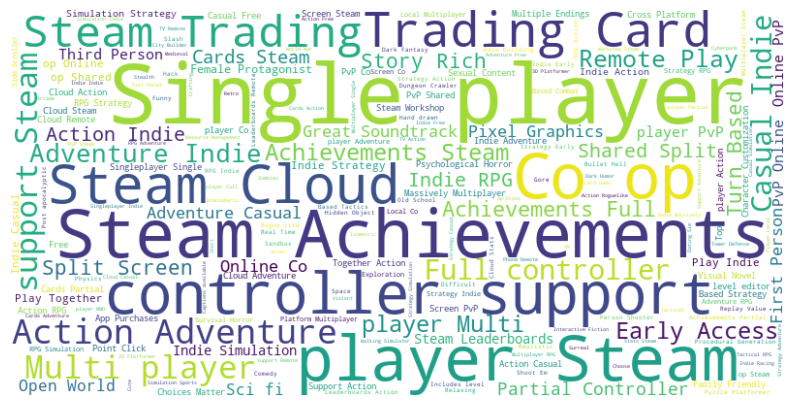

In [ ]:
from wordcloud import WordCloud
import itertools

# Flatten the lists of strings into a single list
combined_features = list(itertools.chain.from_iterable(games_df['combined_features'].dropna()))

# Combine all the strings into a single string
combined_features_string = ' '.join(combined_features)

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_features_string)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()